<a href="https://colab.research.google.com/github/ayushmangupta/TF2/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
class Encoder(tfk.Model):
  def __init__(self,intermidiate_dim):
    super(Encoder,self).__init__()
    self.common_layer = []
    self.common_layer.append(tfkl.InputLayer(input_shape=784))
    self.common_layer.append(tfkl.Dense(units=intermidiate_dim,activation='relu'))
    self.common_layer.append(tfkl.Dense(units=intermidiate_dim,activation='relu'))
 
  
  def call(self,x):
    x = tf.reshape(x,[-1,784])
    for layer in self.common_layer:
      x = layer(x)
    return x
      

In [0]:
class Decoder(tfk.Model):
  def __init__(self,intermidiate_dim,orignal_dim):
    
    super(Decoder,self).__init__()
    self.intermidiate_dim = intermidiate_dim
    self.common_layer = []
    self.common_layer.append(tfkl.InputLayer(input_shape=self.intermidiate_dim))
    self.common_layer.append(tfkl.Dense(units=self.intermidiate_dim,activation='relu'))
    self.common_layer.append(tfkl.Dense(units=orignal_dim,activation='relu'))
 
  
  def call(self,x):
    x = tf.reshape(x,[-1,self.intermidiate_dim])
    for layer in self.common_layer:
      x = layer(x)
      
    return x
      

In [0]:
data = tf.random.normal([32,784])

In [0]:
class AE(tfk.Model):
  def __init__(self,intermidiate_dim, orignal_dim):
    super(AE,self).__init__()
    
    self.encoder = Encoder(intermidiate_dim)
    self.decoder = Decoder(intermidiate_dim, orignal_dim)
    
    
  def call(self,x):
    x = self.encoder(x)
    x = self.decoder(x)
    
    return x

In [0]:
model = AE(64,784)

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = tf.cast(x_train,tf.float32)
x_test = tf.cast(x_test,tf.float32)

x_train = tf.reshape(x_train,shape=[60000,784])
x_test = tf.reshape(x_test,shape=[10000,784])
# Add a channels dimension
#x_train = x_train[..., tf.newaxis]
#x_test = x_test[..., tf.newaxis]
#print(x_train.shape)
#Use tf.data to batch and shuffle the dataset:

train_ds = tf.data.Dataset.from_tensor_slices(
     (x_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices(
     (x_test)).shuffle(10000).batch(32)
# test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
def loss_function(x,x_hat):
  #print(x.dtype,x_hat.dtype)
  reconstruction_error = tf.reduce_mean(tf.square(tf.subtract(x,x_hat)))
  return reconstruction_error

optimizer = tf.keras.optimizers.SGD(0.001,.9)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
@tf.function
def train_step(x):
  with tf.GradientTape() as tape:
    x_hat = model(x)
    print("model_out")
    loss = loss_function(x,x_hat)
    
    print("loss out",loss)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  #train_accuracy(labels, predictions)

@tf.function
def test_step(images):
  predictions = model(images)
  t_loss = loss_function(images,predictions)

  test_loss(t_loss)
  #test_accuracy(labels, predictions)

In [10]:
EPOCHS = 20

for epoch in range(EPOCHS):
  for images in train_ds:
    train_step(images)

  for test_images in test_ds:
    test_step(test_images)

  template = 'Epoch {}, Loss: {},Test Loss: {}'
  #template = "EPOCH {} Loss {} "
  print (template.format(epoch+1,
                         train_loss.result(),
                         
                         test_loss.result()))  

model_out
loss out Tensor("Mean:0", shape=(), dtype=float32)
model_out
loss out Tensor("Mean:0", shape=(), dtype=float32)
Epoch 1, Loss: 0.10225137323141098,Test Loss: 0.09716111421585083
Epoch 2, Loss: 0.09564253687858582,Test Loss: 0.0907098799943924
Epoch 3, Loss: 0.09068190306425095,Test Loss: 0.08700576424598694
Epoch 4, Loss: 0.08760087192058563,Test Loss: 0.08485639840364456
Epoch 5, Loss: 0.08559118956327438,Test Loss: 0.0834413692355156
Epoch 6, Loss: 0.08415625244379044,Test Loss: 0.08241155743598938
Epoch 7, Loss: 0.08308500051498413,Test Loss: 0.08164238184690475
Epoch 8, Loss: 0.08224805444478989,Test Loss: 0.0810152217745781
Epoch 9, Loss: 0.08155433088541031,Test Loss: 0.08049456775188446
Epoch 10, Loss: 0.08097031712532043,Test Loss: 0.08004122972488403
Epoch 11, Loss: 0.08046003431081772,Test Loss: 0.07964334636926651
Epoch 12, Loss: 0.08001147955656052,Test Loss: 0.07928768545389175
Epoch 13, Loss: 0.0796007588505745,Test Loss: 0.07894419133663177
Epoch 14, Loss: 0.07

In [0]:
for images in test_ds:
  dd = model(images)
  break

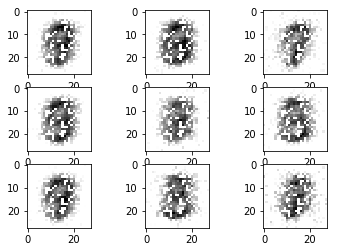

In [12]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(tf.reshape(dd[i],[28,28]),cmap="binary")
plt.show()